<a href="https://colab.research.google.com/github/pravin-pk/Contactless-Payment-Server/blob/main/Final_year_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
model = tf.keras.models.Sequential([
#  tf.keras.layers.Flatten(input_shape=(28,28)),
 tf.keras.layers.Dense(784, activation='relu',input_shape=(784,)),
 tf.keras.layers.Dense(256, activation='relu'),
#  tf.keras.layers.Dropout(0.2),
 tf.keras.layers.Dense(128, activation='relu'),
 tf.keras.layers.Dense(32, activation='relu'),
 tf.keras.layers.Dense(8)
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 784)               615440    
                                                                 
 dense_1 (Dense)             (None, 256)               200960    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 32)                4128      
                                                                 
 dense_4 (Dense)             (None, 8)                 264       
                                                                 
Total params: 853,688
Trainable params: 853,688
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# model.fit(x_train, x_train, epochs=10)


------

In [3]:
# !pip install tensorflow==2.10.0

-----

In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.10.0'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [77]:
# !rm -rf 'ROI'

In [78]:
from zipfile import ZipFile
# PUT YOUR LOCAL FILE PATH HERE
with ZipFile('./drive/MyDrive/Final Year Project/Datasets/ROI.zip', 'r') as zipObj:
   # Extract a specific file from zip file
   zipObj.extractall('./')

In [79]:
# image_generator = ImageDataGenerator(rescale=1.0/255)

In [80]:
# palm_train = image_generator.flow_from_directory('./IITD_dataset/', class_mode='sparse')

In [81]:
# import numpy as np
# from PIL import Image
# import glob

# images = []
# for file in glob.glob('./Segmented/Right/*.JPG'):
#     image = Image.open(file).convert('L')
#     numpy_array = np.array(image)
#     images.append(numpy_array)
# for file in glob.glob('./Segmented/Left/*.JPG'):
#     image = Image.open(file).convert('L')
#     numpy_array = np.array(image)
#     images.append(numpy_array)

# palm_arrays = np.array(images)

In [82]:
import os
import shutil
import re

# Source and destination directories
dest_dir = './ROI/allImages/'
os.makedirs(dest_dir)

# Regex pattern to match specific files
pattern = re.compile(r'\d{3}_\d\.JPG')

# Loop through files in source directory
for file in os.listdir('./ROI/Right/'):
    # Check if file matches pattern
    if pattern.match(file):
        # Move file to destination directory
        shutil.copy(os.path.join('./ROI/Right/', file), os.path.join(dest_dir,f'Right_{file}'))

# Loop through files in source directory
for file in os.listdir('./ROI/Left/'):
    # Check if file matches pattern
    if pattern.match(file):
        # Move file to destination directory
        shutil.copy(os.path.join('./ROI/Left/', file), os.path.join(dest_dir,f'Left_{file}'))

In [83]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Initialize list to store images
images = []

# for filename in os.listdir("./ROI/Left/"):
#     # Read image
#     img = cv2.imread(os.path.join("./ROI/Left/",filename), 0)
    
#     # Append image to list
#     images.append(img)
# for filename in os.listdir("./ROI/Right/"):
#     # Read image
#     img = cv2.imread(os.path.join("./ROI/Right/",filename), 0)
    
#     # Append image to list
#     images.append(img)


# Loop through images in directory
filenames = []
for filename in os.listdir("./ROI/allImages/"):
    filenames.append(filename)
    # Read image
    img = cv2.imread(os.path.join("./ROI/allImages/",filename), 0)
    
    # Append image to list
    images.append(img)

palm_arrays = np.array(images)

In [84]:
palm_arrays.shape

(2601, 150, 150)

In [45]:
x_train = palm_arrays[:2400]
x_test = palm_arrays[2400:]
print(x_train.shape)
print(x_test.shape)

(2400, 150, 150, 3)
(201, 150, 150, 3)


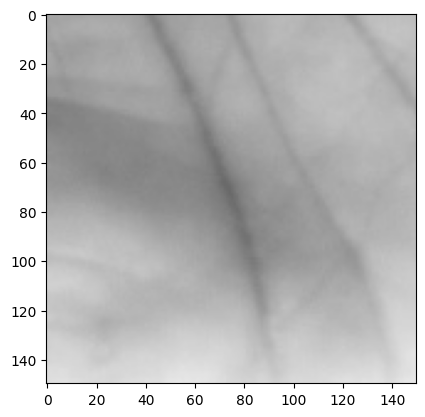

In [46]:
plt.imshow(x_train[0], cmap='gray')

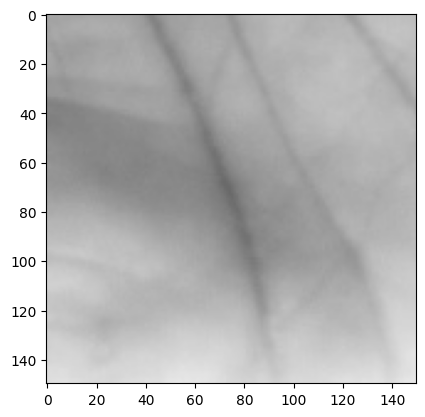

In [47]:
import cv2
plt.imshow(cv2.cvtColor(x_train[0], cv2.COLOR_BGR2RGB))

In [48]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
# x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
# x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
x_train = x_train.reshape(-1, 150, 150, 1)
x_test = x_test.reshape(-1, 150, 150, 1)
print(x_train.shape)
print(x_test.shape)

(7200, 150, 150, 1)
(603, 150, 150, 1)


In [49]:
import tensorflow as tf
from tensorflow import keras

input_img = keras.Input(shape=(150,150,1)) # shape = (width, height, channels)
encoded = keras.layers.Conv2D(7, (3,3), activation='relu', padding='same')(input_img)
encoded = keras.layers.MaxPooling2D((2,2))(encoded)
encoded = keras.layers.Conv2D(9, (3,3), activation='relu', padding='same')(encoded)
encoded = keras.layers.MaxPooling2D((3,3))(encoded)
# encoded = keras.layers.Conv2D(1, (3,3), activation='relu', padding='same')(encoded)
encoded = keras.layers.Flatten()(encoded)
encoded = keras.layers.Dropout(0.3)(encoded)
encoded = keras.layers.Dense(24*24, activation='relu')(encoded)
encoded = keras.layers.Dense(256, activation='relu')(encoded)
# encoded = keras.layers.Dense(64, activation='relu')(encoded)
encoded = keras.layers.Dense(32, activation='relu')(encoded)

decoded_dense0 = keras.layers.Dense(32, activation='relu')(encoded)
# decoded_dense1 = keras.layers.Dense(64, activation='relu')(decoded_dense0)
decoded_dense2 = keras.layers.Dense(256, activation='relu')(decoded_dense0)
decoded_dense3 = keras.layers.Dense(25*25, activation='relu')(decoded_dense2)
decoded_reshaped = keras.layers.Reshape((25,25,1))(decoded_dense3)
decoded_conv0 = keras.layers.Conv2D(9, (3,3), activation='relu', padding='same')(decoded_reshaped)
decoded_upSample0 = keras.layers.UpSampling2D((3,3))(decoded_conv0)
decoded_conv1 = keras.layers.Conv2D(7, (3,3), activation='relu', padding='same')(decoded_upSample0)
decoded_upSample1 = keras.layers.UpSampling2D((2,2))(decoded_conv1)
decoded = keras.layers.Conv2D(1, (3,3), activation='relu', padding='same')(decoded_upSample1)


autoencoder = keras.Model(input_img, decoded)

In [50]:
# Encoder Model
encoder = keras.Model(input_img, encoded)

In [51]:
# Decoder Model
# encoded_inputs = keras.Input(shape=(64,))
# decoded_layers = decoded[-8]

# decoder = keras.Model(encoded_inputs, decoded_layers)

In [52]:
encoder.layers

In [53]:
# encoder.compile(optimizer='adam', loss=tf.keras.losses.mae)

In [54]:
autoencoder.compile(optimizer='adam', loss=tf.keras.losses.binary_crossentropy)

In [55]:
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 1)]     0         
                                                                 
 conv2d_5 (Conv2D)           (None, 150, 150, 7)       70        
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 75, 75, 7)        0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 75, 75, 9)         576       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 25, 25, 9)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5625)              0   

In [56]:
autoencoder.fit(x_train, x_train, epochs=10, shuffle=True, validation_data=(x_test,x_test))

Epoch 1/10
225/225 [==============================] - 266s 1s/step - loss: 0.7631 - val_loss: 0.6030
Epoch 2/10
 71/225 [========>.....................] - ETA: 2:40 - loss: 0.6020

KeyboardInterrupt: ignored

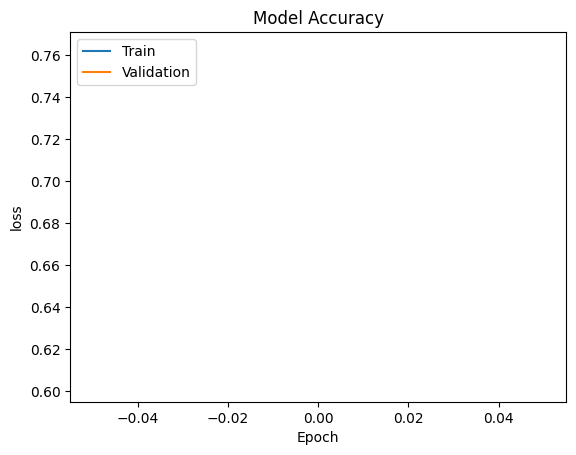

In [57]:
plt.plot(autoencoder.history.history['loss'])
plt.plot(autoencoder.history.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [23]:
encoded_palms = encoder.predict(x_test)

7/7 [==============================] - 1s 131ms/step


In [24]:
encoded_palms.shape

(201, 32)

In [25]:
encoded_palms[9]

array([1.7395232 , 0.        , 0.        , 1.1678613 , 1.1041669 ,
       0.        , 0.        , 3.006793  , 1.807856  , 0.        ,
       3.2357721 , 0.        , 0.        , 0.        , 0.21824628,
       2.1439323 , 0.757361  , 3.2267666 , 4.411522  , 1.5393897 ,
       0.        , 0.        , 0.        , 1.6742853 , 0.        ,
       0.        , 0.93647   , 1.7177204 , 2.3978689 , 0.        ,
       3.2061284 , 0.20230761], dtype=float32)

In [26]:
encoder.save('savedModel/model/0000001')

In [27]:
import tarfile
import os

def make_tarfile(output_filename, source_dir):
    with tarfile.open(output_filename, "w:gz") as tar:
        tar.add(source_dir, arcname=os.path.basename(source_dir))

# make_tarfile("destination", "source")
# CHANGE THE DESTINATION LOCATION AND UPLOAD THE TAR FILE TO DRIVE
make_tarfile("./drive/MyDrive/Final Year Project/Datasets/savedModel/model.tar.gz", "./savedModel/model/")

In [28]:
# !zip -r ./savedModel/palm_encoder.zip ./savedModel/encoder_conv_model

In [29]:
# from google.colab import files
# files.download("./savedModel/model.tar.gz")

In [30]:
img = cv2.imread('./ROI/Right/003_3.JPG', 0)
palm = np.array(img.astype('float32')/255.0)

normal = encoder.predict(palm.reshape(-1, 150, 150, 1))

1/1 [==============================] - 0s 46ms/step


[[1.6919936  0.         0.         1.1117938  1.0690683  0.
  0.         2.927361   1.7630013  0.         3.139536   0.
  0.         0.         0.19181666 2.0682142  0.7327165  3.1305559
  4.2707148  1.5006763  0.         0.         0.         1.6373595
  0.         0.         0.9177039  1.6844363  2.3198147  0.
  3.108198   0.1930178 ]]


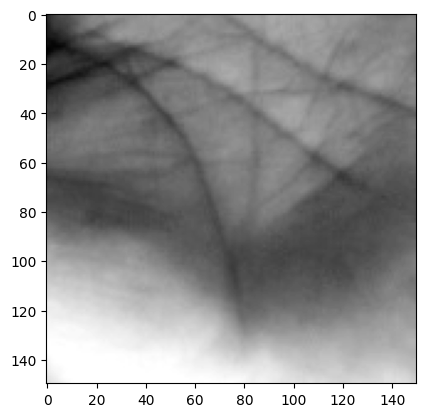

In [31]:
plt.imshow(palm, cmap='gray')
print(normal)

In [32]:
img = cv2.imread('./ROI/Right/008_3.JPG', 0)
palm = np.array(img.astype('float32')/255.0)

abnormal = encoder.predict(palm.reshape(-1, 150, 150, 1))

1/1 [==============================] - 0s 44ms/step


[[1.6919936  0.         0.         1.1117938  1.0690683  0.
  0.         2.927361   1.7630013  0.         3.139536   0.
  0.         0.         0.19181666 2.0682142  0.7327165  3.1305559
  4.2707148  1.5006763  0.         0.         0.         1.6373595
  0.         0.         0.9177039  1.6844363  2.3198147  0.
  3.108198   0.1930178 ]]


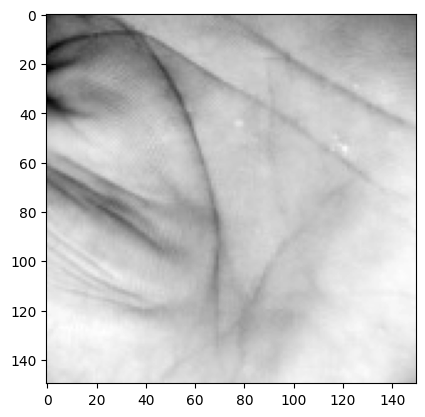

In [33]:
plt.imshow(palm, cmap='gray')
print(normal)

In [34]:
np.mean(np.abs(normal - abnormal))

0.13834368

1/1 [==============================] - 0s 28ms/step


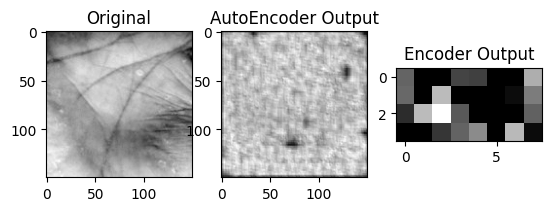

In [35]:
fig, ax = plt.subplots(1,3)
img = cv2.imread('./ROI/Left/005_2.JPG', 0)
palm = np.array(img.astype('float32')/255.0)
ax[0].imshow(palm, cmap='gray')
ax[0].set_title("Original")

auto = autoencoder.predict(palm.reshape(-1, 150, 150, 1))
# auto = decoder.predict(encoder.predict(palm.reshape(-1,150,150,1)))
auto = auto.reshape(150,150)
ax[1].imshow(auto, cmap='gray')
ax[1].set_title("AutoEncoder Output")

encoded_img = encoder.predict(palm.reshape(-1, 150, 150, 1))
encoded_img = encoded_img.reshape(4,8)
ax[2].imshow(encoded_img, cmap='gray')
ax[2].set_title("Encoder Output")

plt.show()

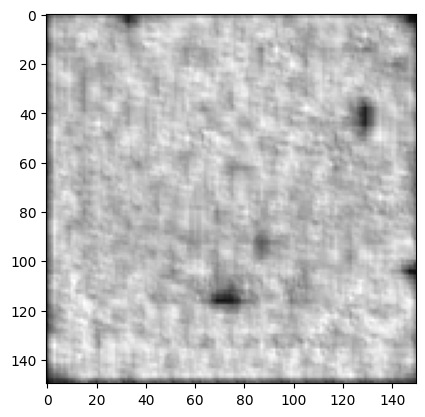

In [36]:
plt.imshow(auto, cmap='gray')

In [37]:
# img = x_test[80].reshape(-1, 150, 150, 1)
# encoder.predict(img)

---

In [90]:
model = tf.keras.models.load_model('savedModel/model/0000001')

In [91]:
tests = encoder.predict(x_test)

245/245 [==============================] - 49s 198ms/step


In [92]:
tests.shape

(7833, 32)

In [75]:
rm -rf testROI

In [85]:
with ZipFile('./drive/MyDrive/Final Year Project/Datasets/testROI.zip', 'r') as zipObj:
   # Extract a specific file from zip file
   zipObj.extractall('./')

testfilenames = []
images = []
for filename in os.listdir("./testROI"):
    testfilenames.append(filename)
    # Read image
    img = cv2.imread(os.path.join("./testROI/",filename), 0)
    
    # Append image to list
    images.append(img)

palm_arrays = np.array(images)

In [87]:
palm_arrays = palm_arrays.astype('float32') / 255.
palm_arrays = palm_arrays.reshape(-1, 150, 150, 1)
print(palm_arrays.shape)

(10, 150, 150, 1)


In [95]:
tests = encoder.predict(palm_arrays)

1/1 [==============================] - 0s 82ms/step


In [96]:
testfilenames

['001_1.JPG',
 '004_4.JPG',
 '001_3.JPG',
 '004_1.JPG',
 '004_3.JPG',
 '004_2.JPG',
 '004_5.JPG',
 '001_5.JPG',
 '001_2.JPG',
 '001_4.JPG']

In [97]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
kmeans.fit(tests)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [98]:
kmeans.labels_

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0], dtype=int32)

In [ ]:
from sklearn.cluster import SpectralClustering